In [1]:
#https://www.datacamp.com/community/tutorials/streaming-platform-analysis

In [129]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import hstack

%matplotlib inline

In [41]:
#Load Dataset
df = pd.read_csv('kaggle/tvshow.csv')

In [42]:
df = df.iloc[:,1:] # removing in unnamed index column
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


In [44]:
# Working with Missing Values

miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0: 'miss_count'})

In [45]:
miss['miss_%'] = (miss.miss_count / len(df.ID))*100

In [46]:
# Cleaning
#dropping values with missing % morre than 50%
df.drop(['Age'], axis = 1, inplace=True)

In [47]:
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 
                 'Language', 'Runtime'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [48]:
# Converting into object type
df['Year'] = df.Year.astype('object')

In [49]:
# Cleaning Variables IMDb
df['IMDb'] = df['IMDb'].str.replace(r'[/]', '', regex=True)

In [50]:
# Cleaning Variables IMDb
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace(r'[/]', '', regex=True)

In [51]:
df['IMDb'] = df['IMDb'].astype('float64')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype('float64')
df['ID'] = df.Year.astype('object')

In [52]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'] / 100000

In [53]:
df.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,2019,The Irishman,2019,7.81,0.981,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2016,Dangal,2016,8.41,0.971,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2020,David Attenborough: A Life on Our Planet,2020,9.01,0.951,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,2001,Lagaan: Once Upon a Time in India,2001,8.11,0.941,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,2018,To All the Boys I've Loved Before,2018,7.11,0.941,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8695 non-null   object 
 1   Title            8695 non-null   object 
 2   Year             8695 non-null   object 
 3   IMDb             8695 non-null   float64
 4   Rotten Tomatoes  8695 non-null   float64
 5   Netflix          8695 non-null   int64  
 6   Hulu             8695 non-null   int64  
 7   Prime Video      8695 non-null   int64  
 8   Disney+          8695 non-null   int64  
 9   Type             8695 non-null   int64  
 10  Directors        8695 non-null   object 
 11  Genres           8695 non-null   object 
 12  Country          8695 non-null   object 
 13  Language         8695 non-null   object 
 14  Runtime          8695 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 1019.1+ KB


In [55]:
categorical = []
numerical = []

for i in range(df.columns.size):
    if df.iloc[:,i].dtype =="object":
        categorical.append(df.columns[i])
    else:
        numerical.append(df.columns[i])

In [59]:
def distplot(df, feat):
    
    plt.figure(figsize=(20,10))
    sns.distplot(df[feat])
    plt.title(feat)
    plt.xticks(rotation = 60)
    plt.show()

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


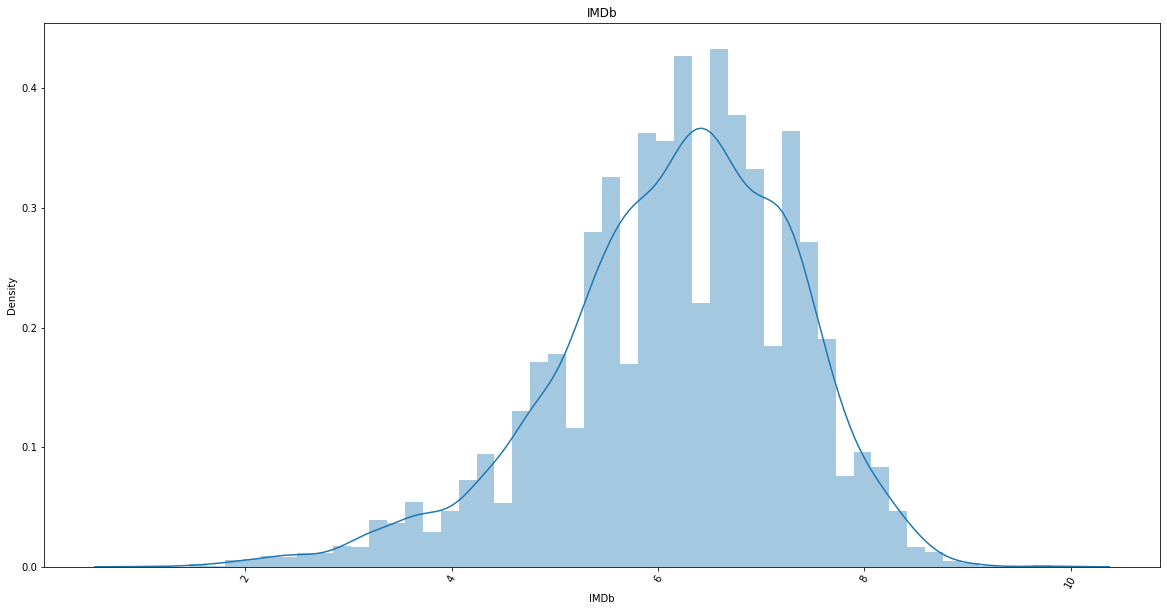

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


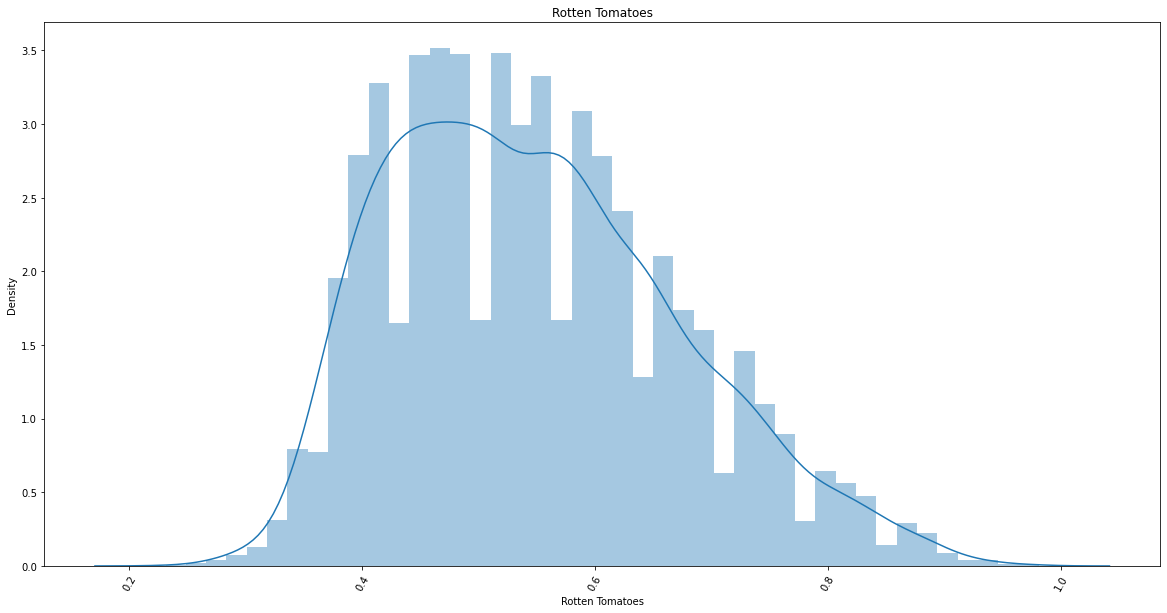

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


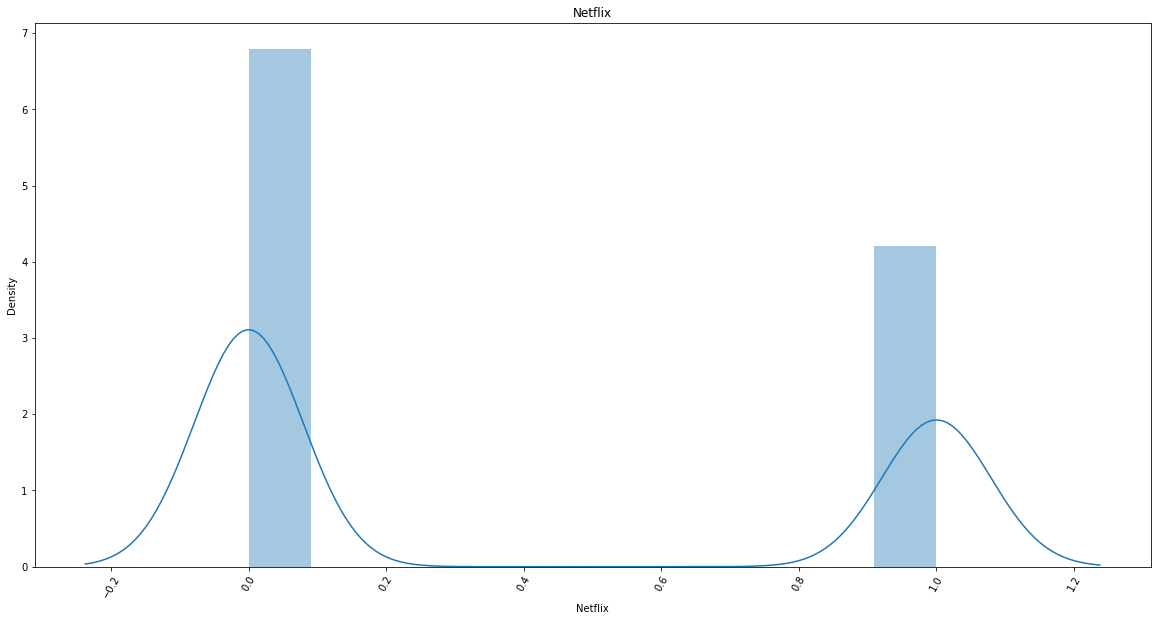

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


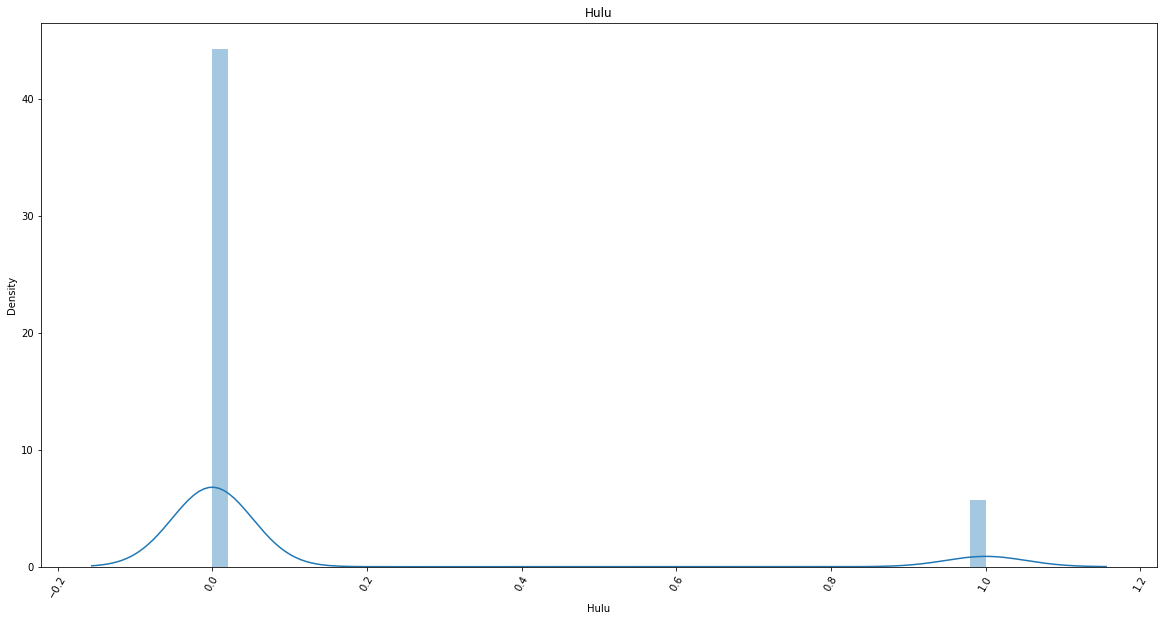

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


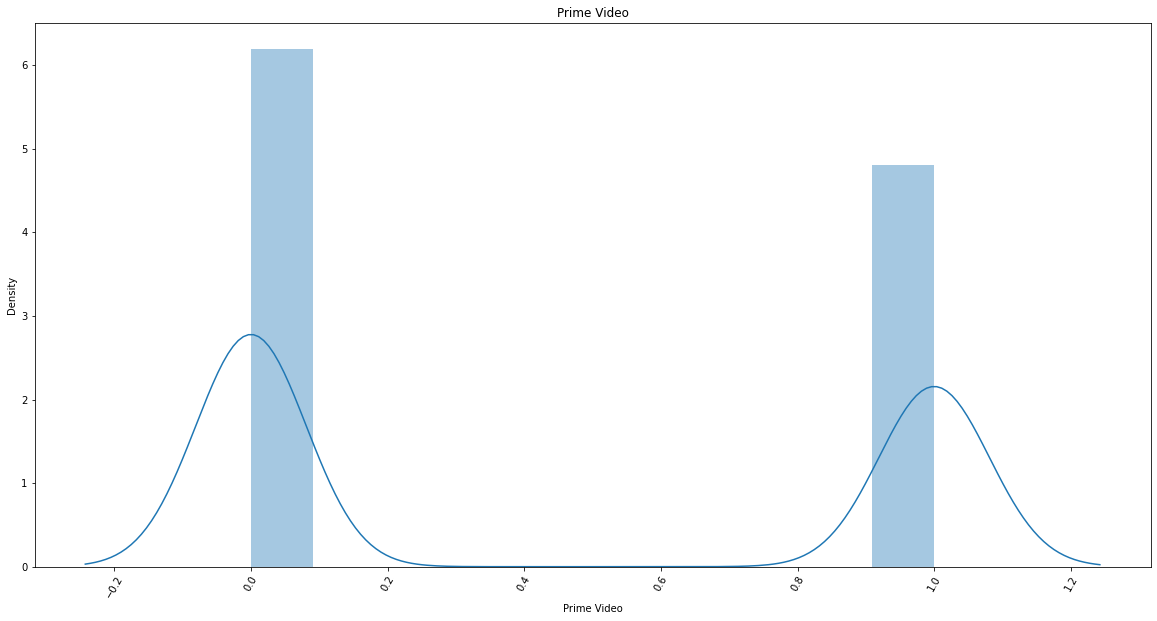

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


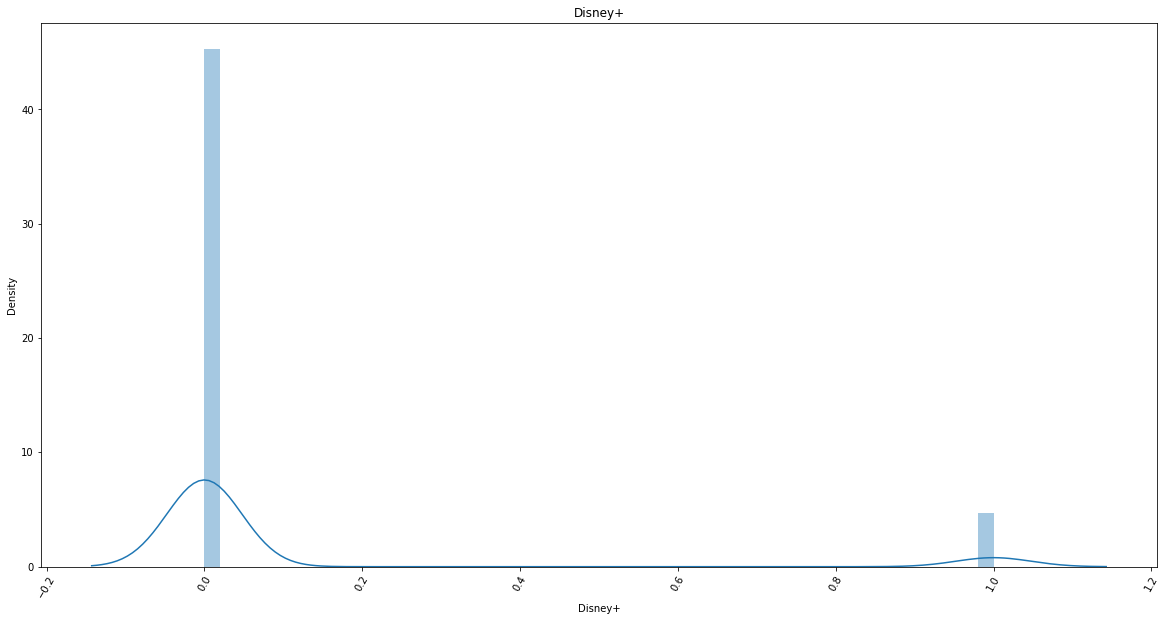

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


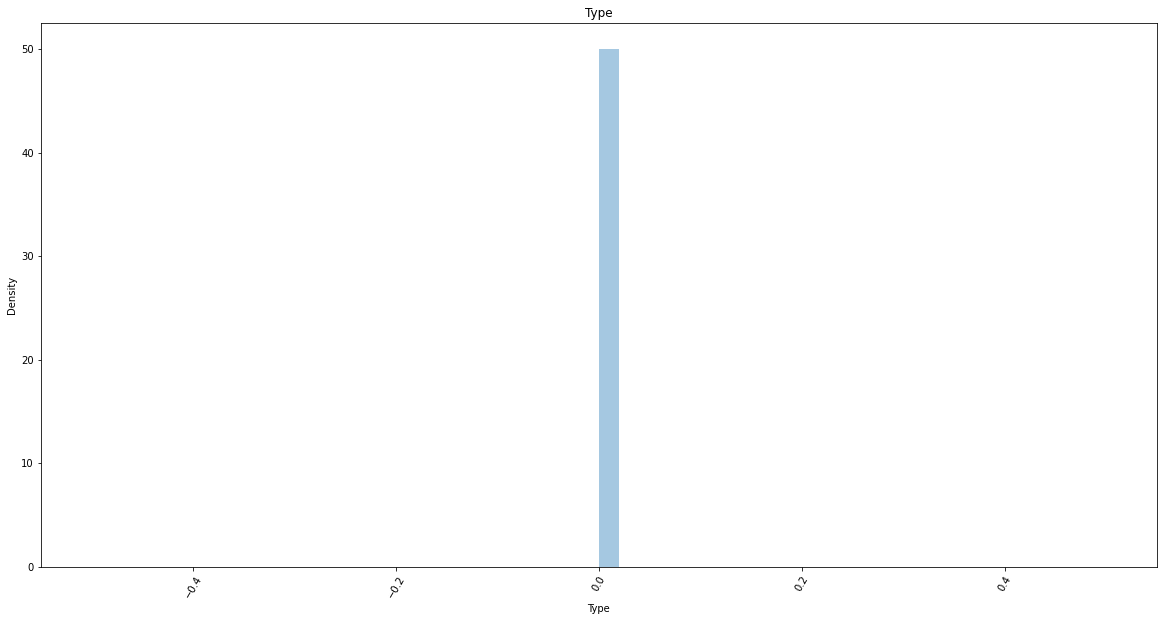

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


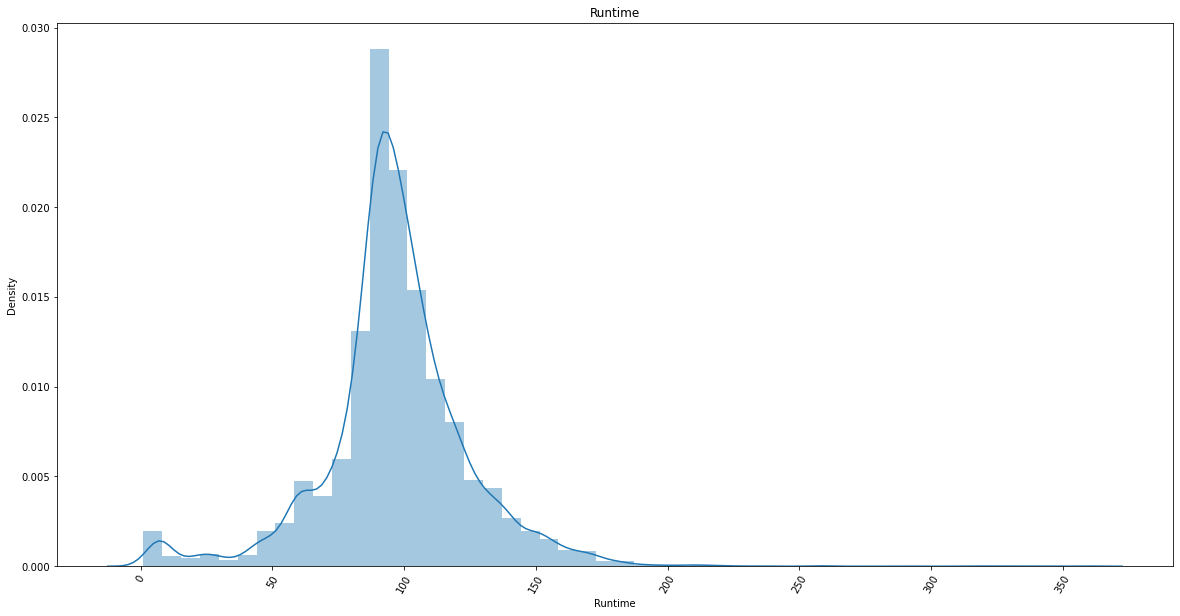

In [60]:
for feat in numerical:
    distplot(df, feat)

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


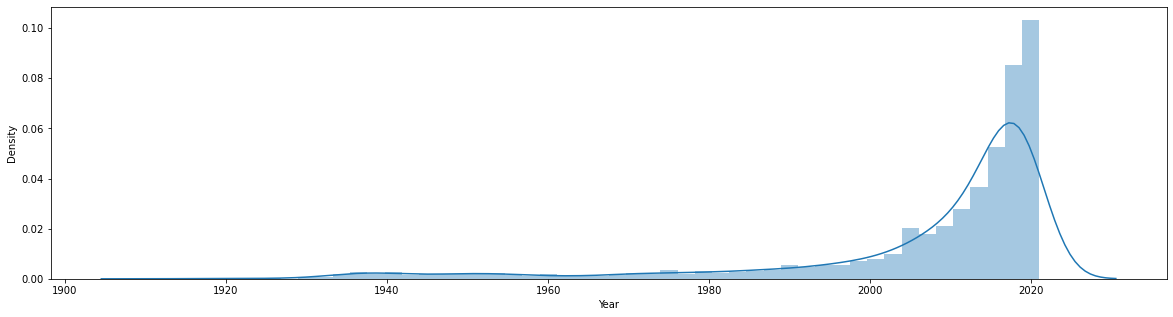

In [62]:
# DISTRIBUTION PLOTS

# Checking Distribution of Years
plt.figure(figsize=(20,5))
sns.distplot(df['Year'])
plt.show()

In [63]:
"""
The chart is showing the distribution of movies origin year.
The most of the movies were made between the year 200 to 2020.
"""

'\nThe chart is showing the distribution of movies origin year.\nThe most of the movies were made between the year 200 to 2020.\n'

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


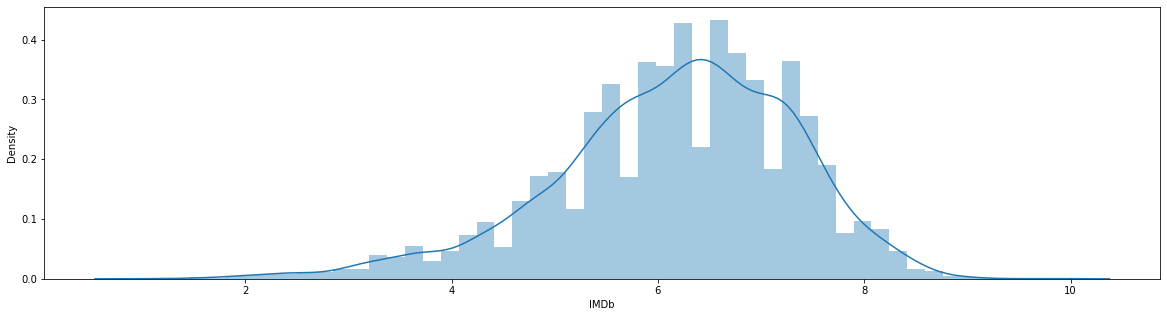

In [64]:
# Checking Distribution of IMDb
plt.figure(figsize=(20,5))
sns.distplot(df['IMDb'])
plt.show()

In [65]:
"""
The distributin plot is slightly skewed, so we can interpret 
that the mean IMDB of most movies is 6.5
"""

'\nThe distributin plot is slightly skewed, so we can interpret \nthat the mean IMDB of most movies is 6.5\n'

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


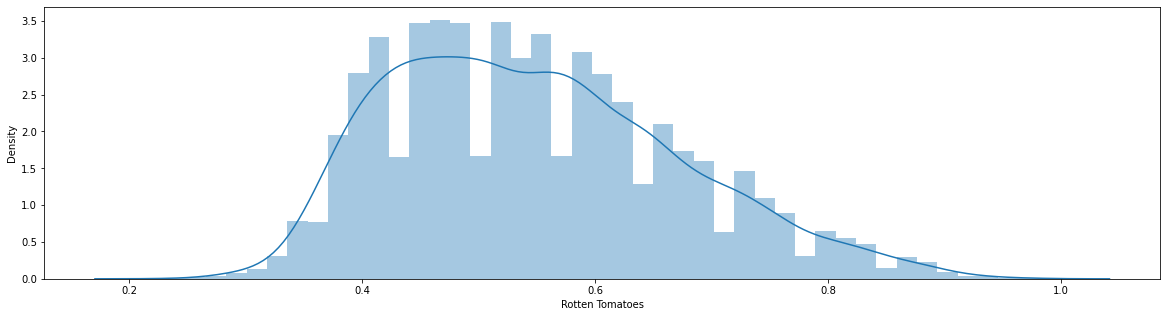

In [66]:
# Checking Distribution of Rotten Tomatoes
plt.figure(figsize=(20,5))
sns.distplot(df['Rotten Tomatoes'])
plt.show()

C:\Users\conra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


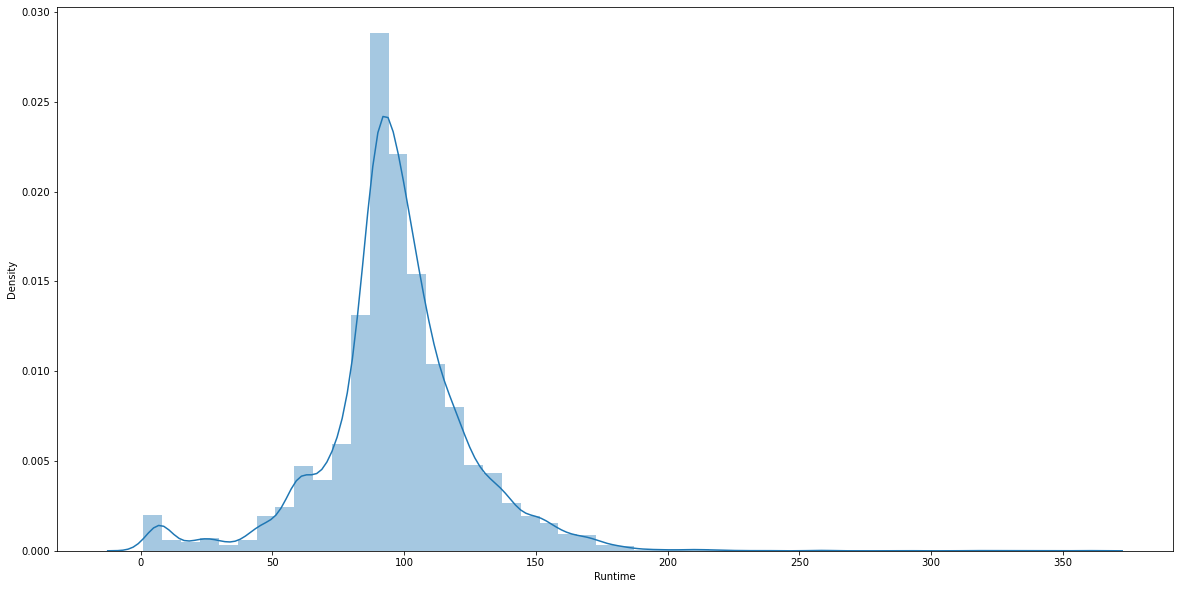

In [67]:
# Checking Distribution of Runtime
plt.figure(figsize=(20,10))
sns.distplot(df['Runtime'])
plt.show()

In [68]:
#Distribution of Movies on Each Streaming Platform

# Function to calculate the movies in differente Streaming plataforms
def m_cnt(plat, count=False):
    
    if count==False:
        print('Plataform {} Count: {}'.format(plat, df[plat].sum()))
        
    else:
        return df[plat].sum()

In [69]:
# Lets see count of movies / shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Plataform Netflix Count: 3325
Plataform Hulu Count: 998
Plataform Prime Video Count: 3799
Plataform Disney+ Count: 819


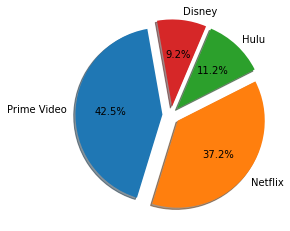

In [70]:
# Moveis on each platform

lab = 'Prime Video', 'Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(s, 
       labels= lab,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()

In [71]:
"""
Above the plot, Prime videos is hosting the maximum number of titles, 
with 42,5% share and Netflix hosting 37,2%.
"""

'\nAbove the plot, Prime videos is hosting the maximum number of titles, \nwith 42,5% share and Netflix hosting 37,2%.\n'

In [72]:
# MOVIE DISTRIBUTION ACCORDING TO GENRE

# split the genres by ',' & then stack it one after the other for easy analysus
g = df['Genres'].str.split(',').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)

In [73]:
# Assign name to column
g.name = 'Genres'

In [74]:
# join new column with the existing dataframe
df_genres = df.join(g)

ValueError: columns overlap but no suffix specified: Index(['Genres'], dtype='object')

In [75]:
# Count of movies according to genre
plt.figure(figsize=(15,5))
sns.countplot(x='Genres', data = df_genres)
plt.xticks(rotation=90)
plt.show()

NameError: name 'df_genres' is not defined

<Figure size 1080x360 with 0 Axes>

In [76]:
"""
The movies have a common genre as Drama and Comedy
"""

'\nThe movies have a common genre as Drama and Comedy\n'

In [77]:
# MOVIE DISTRIBUTION ACCORDING TO COUNTRY

# split the COUNTRY by ',' & then stack it one after the other for easy analysus
c = df['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)

In [78]:
# Assign name to column
c.name = 'Country'

In [79]:
# delete column
del df['Country']

In [80]:
# join new column with the existing dataframe
df_country = df.join(c)

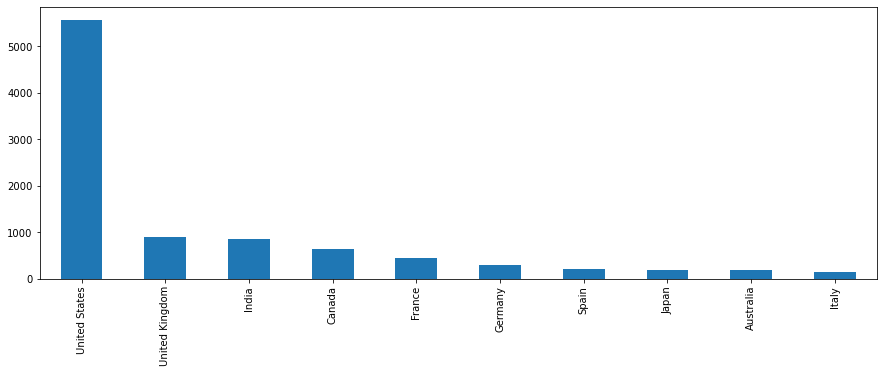

In [81]:
# plotting top 10 country and movie count 
df_country['Country'].value_counts()[:10].plot(kind='bar', figsize=(15,5))
plt.show()

In [82]:
"""
The graph shows that the majority of the movies were made in the United States 
"""

'\nThe graph shows that the majority of the movies were made in the United States \n'

In [83]:
# MOVIE DISTRIBUTION ACCORDING TO lANGUAGE

# split the lANGUAGE by ',' & then stack it one after the other for easy analysus
l = df['Language'].str.split(',').apply(pd.Series, 1).stack()
l.index = l.index.droplevel(-1)

In [84]:
# Assign name to column
l.name = 'Language'

In [85]:
# delete column
del df['Language']

In [86]:
# join new column with the existing dataframe
df_language = df.join(l)

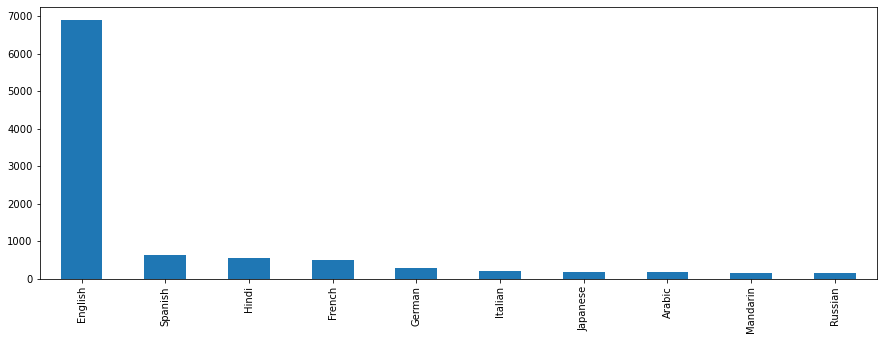

In [87]:
# plotting top 10 country and movie count 
df_language['Language'].value_counts()[:10].plot(kind='bar', figsize=(15,5))
plt.show()

In [88]:
"""
The graph shows that the majority of the movies were in the English languages.
""" 

'\nThe graph shows that the majority of the movies were in the English languages.\n'

In [89]:
# MOVIE DISTRIBUTION ACCORDING TO EACH PLATAFORM

# melting plataform columns to create visualization

df2 = pd.melt(df, id_vars=['ID', 'Title', 'Year', 'IMDb', 
                           'Rotten Tomatoes', 'Type', 'Runtime'],
             var_name='plataform')

df2 = df2[df2.value==1]
df2.drop(columns=['value'], axis=1, inplace=True)

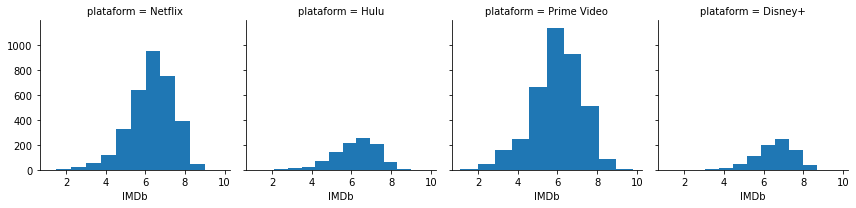

In [90]:
# Distribution of IMDB rating in different platform

g = sns.FacetGrid(df2, col='plataform')
g.map(plt.hist,'IMDb')
plt.show()

In [39]:
# RUNTIME PER PLATAFORM ALONG WITH AGE GROUP
""""
# Load dataset
df = pd.read_csv("kaggle/tvshow.csv")
df=df.iloc[:,1:]
df.ID = df.ID.astype("object")

# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb",
                           "Rotten Tomatoes","Type","Runtime"], 
              var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)

# total of runtime in different platform

ax = sns.barplot(x='platform', y='Runtime', hue='Age', 
                 estimator=sum, data=df2)
                 
"""

'"\n# Load dataset\ndf = pd.read_csv("kaggle/tvshow.csv")\ndf=df.iloc[:,1:]\ndf.ID = df.ID.astype("object")\n\n# melting platform columns to create visualization\ndf2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb",\n                           "Rotten Tomatoes","Type","Runtime"], \n              var_name="platform")\ndf2 = df2[df2.value==1]\ndf2.drop(columns=["value"],axis=1,inplace=True)\n\n# total of runtime in different platform\n\nax = sns.barplot(x=\'platform\', y=\'Runtime\', hue=\'Age\', \n                 estimator=sum, data=df2)\n                 \n'

In [ ]:
"""
The above plots shows that the total runtime on Prime Videos 
by 18+ age groups users is higher than compared to any other
platform.
"""

In [91]:
# BUILDING A RECOMMENDER SYSTEM

"""
Build two Recommender sytem based on cosine similarity:
1. Using only the numerical variable
2. Using both numerical and categorical variable
"""

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8695 non-null   object 
 1   Title            8695 non-null   object 
 2   Year             8695 non-null   object 
 3   IMDb             8695 non-null   float64
 4   Rotten Tomatoes  8695 non-null   float64
 5   Netflix          8695 non-null   int64  
 6   Hulu             8695 non-null   int64  
 7   Prime Video      8695 non-null   int64  
 8   Disney+          8695 non-null   int64  
 9   Type             8695 non-null   int64  
 10  Directors        8695 non-null   object 
 11  Genres           8695 non-null   object 
 12  Runtime          8695 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 883.2+ KB


In [94]:
# numerical variable
# Step-1: Select the numerical variable
ndf = df.select_dtypes(include=['float64', 'int64'])

,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,7.81,0.981,1,0,0,0,0,209.0
1,8.41,0.971,1,0,0,0,0,161.0
2,9.01,0.951,1,0,0,0,0,83.0
3,8.11,0.941,1,0,0,0,0,224.0
4,7.11,0.941,1,0,0,0,0,99.0
...,...,...,...,...,...,...,...,...
8690,6.91,0.371,0,0,0,1,0,78.0
8691,7.01,0.351,0,0,0,1,0,44.0
8692,5.61,0.341,0,0,0,1,0,60.0
8693,7.31,0.331,0,0,0,1,0,47.0


In [97]:
# STEP 2
""" 
Scaling the numerical varible using a min-max scaler to reduce
the model complexity and training time
"""

# Create MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0,1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

In [100]:
# assign columns names
ndfmx.columns = ndf.columns

ndfmx.head()

,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.770115,1.000000,1.0,0.0,0.0,0.0,0.0,0.581006
1,0.839080,0.986667,1.0,0.0,0.0,0.0,0.0,0.446927
2,0.908046,0.960000,1.0,0.0,0.0,0.0,0.0,0.229050
3,0.804598,0.946667,1.0,0.0,0.0,0.0,0.0,0.622905
4,0.689655,0.946667,1.0,0.0,0.0,0.0,0.0,0.273743


In [102]:
# STEP  - Compute similarity score using cosine similarity

sig = cosine_similarity(ndfmx, ndfmx)

# Reverse mapping of indices and movie tittles

indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [114]:
indices

Title
The Irishman                                   0
Dangal                                         1
David Attenborough: A Life on Our Planet       2
Lagaan: Once Upon a Time in India              3
To All the Boys I've Loved Before              4
                                            ... 
Penguins: Life on the Edge                  8690
Man Among Cheetahs                          8691
Sultan And The Rock Star                    8692
My Music Story: Yoshiki                     8693
Disney Channel Halloween House Party        8694
Length: 8695, dtype: int64

In [110]:
# STEP 4 - Writing a function to get recommendations based on similarity score

def give_rec(title, sig=sig):
    
    # get the indez corresponding to original_title
    idx = indices[title]
    
    # get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))
    
    # sort the movies
    sig_scores = sorted(sig_scores, key= lambda x: x[1], reverse=True)
    
    # scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]
    
    # movie indices
    movie_indices = [i[0] for i in sig_scores]
    
    #Top 10 most similiar movies
    return df['Title'].iloc[movie_indices]
    

In [172]:
# Execute get_rec() function for getting recommendation

give_rec("The Lion King",sig = sig)

7907                         Toy Story
7904                            WALL·E
7908                                Up
7910                      Finding Nemo
7901                              Soul
7911                              Coco
7912                       Toy Story 3
7927                The Princess Bride
7929                       Toy Story 2
7940    The Nightmare Before Christmas
Name: Title, dtype: object

In [ ]:
"""
CONCLUSION

This recommendation system are not up to the mark. The reason behind
this poor result is that you are using only a few numerical variables.
To improve the system we need to use other information in the 
another variables.

"""

In [ ]:
# USING NUMERICAL AND TEXTUAL COLUMNS
"""
STEPS:

1. Selection all objects and storing then in a list
2. Removing ID an Title Columns
3. Joining all text/object columns using commas into a single column
4. Creating a tokenizer to remove unwanted elements from our data
5. Converting TfidfVector from the text (pre processing)
6. Selecting numerical variables
7. Scaling Numerical Variables using min-max Scales
8. Adding Numerical Variables in the TF-IDF vectors sparse matrix
using hstack function)
"""

In [151]:
# the function performs all the important preprocessing steps

def preprocess(df):
    
    #combining all text columns
    #selection all objects data type and storing into a list
    s = list(df.select_dtypes(include=['object']).columns)
    
    s.remove('Title')
    s.remove('ID')
    
    #joining all text/object columns using commas into a single column
    df['all_text'] = df[s].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
    
    # creating a tokenizer to remove unwanted elements
    token = RegexpTokenizer(r'[a-zA-Z]+')
    
    # converting TfidfVector
    cv = TfidfVectorizer(lowercase = True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
    text_counts = cv.fit_transform(df['all_text'])
    
    # Selecting Numerical Variables
    ndf = df.select_dtypes(include=['float64', 'int64'])

    # Scaling Numerical Variables
    scaler = MinMaxScaler(feature_range=(0,1))
    
    # Create dataframe after transformation
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns 
    
    # Adding our adding numerical variable in the TF-IDF vector
    IMDB = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDB))
    
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    
    Tomatoes = ndfmx['Rotten Tomatoes'].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Tomatoes))
    
    return X_train_dtm
    

In [152]:
# Step-2: Applying the function to our data and creating a sparse matrix
# Preprocessing Data
mat = preprocess(df)
mat.shape

In [154]:
# STEP 3 - Applying Cosine Similarity
sig2 = cosine_similarity(mat, mat)

# Reverse mapping of indices and movie tittles

indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [171]:
# Step-4 - Get a recommendation from our improved System

give_rec("The Lion King",sig = sig2)

8190                The Haunted Mansion
8454                      Tummy Trouble
7927                 The Princess Bride
8045               Mary Poppins Returns
8072    The Lion King II: Simba's Pride
7907                          Toy Story
7896                       Mary Poppins
7940     The Nightmare Before Christmas
7934                             Frozen
7993                                Rio
Name: Title, dtype: object

In [170]:
df[['Title', 'IMDb']].sort_values(by='IMDb', ascending=False)[20:45]

,Title,IMDb
4786,Tom Petty and the Heartbreakers: Runnin' Down ...,8.61
5739,Eh Janam Tumhare Lekhe,8.61
4690,George Carlin: You Are All Diseased,8.61
4428,Stop Making Sense,8.61
4601,George Carlin: It's Bad for Ya!,8.61
3327,Parasite,8.61
6959,Ostatni ludzie Czarnobyla 2,8.61
4978,Zakir Khan : Haq Se Single,8.61
918,Bill Hicks: Relentless,8.61
4305,It's a Wonderful Life,8.61
